# Laboratory 1: Introduction to PyTorch and Text Preprocessing

Welcome to Laboratory 1! In this session, we will dive into the world of deep learning using PyTorch, one of the most popular and powerful deep learning frameworks available today. This tutorial is designed for individuals who are familiar with Python but new to PyTorch and its applications in deep learning.

## What is PyTorch?

PyTorch is a machine learning framework based on the Torch library,used for applications such as computer vision and natural language processing, originally developed by Meta AI and now part of the Linux Foundation umbrella. It is known for its flexibility, ease of use, and as a natural choice for Python programmers due to its seamless integration with the Python ecosystem.

## What You Will Learn

In this tutorial, you will learn:
1. **Basics of PyTorch:** Understanding tensors (the building blocks of PyTorch), and how to perform operations on them.
2. **Text Preprocessing:** Since our focus is on text data, you will learn various text preprocessing techniques essential for natural language processing (NLP) tasks.

## Prerequisites

To get the most out of this tutorial, you should have:
- Basic knowledge of Python programming.
- Familiarity with fundamental concepts of machine learning (optional but recommended).

## Setup

Before we begin, ensure that you have installed PyTorch on your system. If you haven't, you can find the installation instructions [here](https://pytorch.org/get-started/locally/).

Ready to embark on this exciting journey into Natural Language Processing with PyTorch? Let's get started!


## Part 1: Pytorch basics

**Tensors** are PyTorch's most basic building block. Here's how to create a tensor:

In [6]:
# Import PyTorch
import torch

# Create a tensor
tensor = torch.tensor([
                    [0, 1],
                    [2, 3],
                    [4, 5]
                    ])
print("Tensor:", tensor)

Tensor: tensor([[0, 1],
        [2, 3],
        [4, 5]])


Each tensor has a **data type**: the major data types you'll need to worry about are floats (`torch.float32`) and integers (`torch.int`). You can specify the data type explicitly when you create the tensor:

In [7]:
# Initializing a tensor with an explicit data type
# Notice the dots after the numbers, which specify that they're floats
data = torch.tensor([
                    [0, 1],
                    [2, 3],
                    [4, 5]
                    ], dtype=torch.float32)
print(data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


Similar to numpy, the `shape` attribute can be called to obtain the dimensions of the tensor.

In [8]:
print("Tensor shape:", data.shape) # Devuelve las filas, las columnas

Tensor shape: torch.Size([3, 2])



We can think of tensors as multidimensional arrays of numbers, as a generalization of scalars, vectors, and matrices.

- **Rank 0 Tensor**: represents a **scalar** value, an element of $\mathbb{R}$.

- **Rank 1 Tensor**: represents a **vector** in $n$-dimensional space $\mathbb{R}^n$

- **Rank 2 Tensor**: represents a **matrix** with $n$ rows and $m$ columns, an element of $\mathbb{R}^n \times \mathbb{R}^m$.

- **Rank 3 Tensor**: represents a **tensor** with dimensions $n \times m \times p$, an element of   $\mathbb{R}^n \times \mathbb{R}^m \times \mathbb{R}^p$.

- **Etc**!

![Image](https://miro.medium.com/v2/resize:fit:1400/1*YJ-dvX4aRONz0wGdUDR92w.png)

In [9]:
# Create a rank 1 tensor (corresponds to a vector) with values 1, 2, 3, 4, 5
rank_1_tensor = torch.tensor([1, 2, 3, 4, 5])

print("Rank 1 Tensor (Vector):")
print(rank_1_tensor)
print("Tensor shape:", rank_1_tensor.shape)

Rank 1 Tensor (Vector):
tensor([1, 2, 3, 4, 5])
Tensor shape: torch.Size([5])


In [10]:
# Create a rank 2 tensor (Matrix)
rank_2_tensor = torch.tensor([[ 1,  2,  3],
                              [ 4,  5,  6],
                              [ 7,  8,  9],
                              [10, 11, 12],
                              [13, 14, 15]])

print("Rank 2 Tensor (Matrix):")
print(rank_2_tensor)
print("Tensor shape:", rank_2_tensor.shape)

Rank 2 Tensor (Matrix):
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
Tensor shape: torch.Size([5, 3])


In [11]:
# Create a rank 3 tensor with dimensions [3, 3, 3]
rank_3_tensor = torch.tensor([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
    [[19, 20, 21], [22, 23, 24], [25, 26, 27]]
])

# Print the tensor
print("Rank 3 Tensor:")
print(rank_3_tensor)
print("3D Tensor shape:", rank_3_tensor.shape)

Rank 3 Tensor:
tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]])
3D Tensor shape: torch.Size([3, 3, 3])


There are situations where the tensor shape shall be altered for various operations, such as feeding it into a neural network layer. Pytorch provides the `view` method for reshaping tensors. It's important to note that these methods return a new tensor without modifying the original one.

In [12]:
data, data.shape

(tensor([[0., 1.],
         [2., 3.],
         [4., 5.]]),
 torch.Size([3, 2]))

In [13]:
viewed_data = data.view((2, 3))
print(viewed_data)
print("Reshaped tensor shape:", viewed_data.shape)
# Reorganiza el tensor, cogiendolos en orden. En este caso, como lo queremos
# enseñar como 2x3, coge elementos en orden hasta completar una fila.

tensor([[0., 1., 2.],
        [3., 4., 5.]])
Reshaped tensor shape: torch.Size([2, 3])


Another aspect of manipulating tensor shapes is the use of `squeeze` and `unsqueeze` methods. `squeeze` removes dimensions of size 1 from the tensor, and `unsqueeze` adds an extra dimension of size 1. These methods are particularly useful when you need to adjust the dimensions of a tensor to meet the input requirements of certain operations.


In [14]:
data = torch.tensor([[
    [2, 1],
    [3, 2]
]
])
print("Original tensor shape:", data.shape)

# Squeezing a tensor
squeezed_data = data.squeeze()
print("Squeezed tensor shape:", squeezed_data.shape)
print(squeezed_data)

# Unsqueezing a tensor
unsqueezed_data = squeezed_data.unsqueeze(1)
print("Unsqueezed tensor shape:", unsqueezed_data.shape)
print(unsqueezed_data)

Original tensor shape: torch.Size([1, 2, 2])
Squeezed tensor shape: torch.Size([2, 2])
tensor([[2, 1],
        [3, 2]])
Unsqueezed tensor shape: torch.Size([2, 1, 2])
tensor([[[2, 1]],

        [[3, 2]]])


In PyTorch, transposing a tensor is a common operation, especially in tasks involving matrix manipulations. Transposing a tensor means swapping its dimensions. For a 2D tensor (matrix), it means swapping rows and columns. The torch.transpose function or the T attribute for 2D tensors can be used for this purpose. For higher-dimensional tensors, you specify the two dimensions you want to swap.

In [15]:
# Transposing a 2D tensor (matrix)
matrix = torch.tensor([[1, 2], [3, 4]])
transposed_matrix = matrix.T  # or torch.transpose(matrix, 0, 1)
print("Original Matrix:\n", matrix)
print("Transposed Matrix:\n", transposed_matrix)

# Transposing a higher-dimensional tensor
tensor_3d = torch.randn(2, 3, 4)  # Example 3D tensor
transposed_tensor = tensor_3d.transpose(0, 1)  # Swapping dimension 0 and 1
print("Original 3D Tensor Shape:", tensor_3d.shape)
print("Transposed 3D Tensor Shape:", transposed_tensor.shape)

Original Matrix:
 tensor([[1, 2],
        [3, 4]])
Transposed Matrix:
 tensor([[1, 3],
        [2, 4]])
Original 3D Tensor Shape: torch.Size([2, 3, 4])
Transposed 3D Tensor Shape: torch.Size([3, 2, 4])


Utility functions also exist to create tensors with given shapes and contents:

In [16]:
zeros = torch.zeros(2, 5)  # a tensor of all zeros
print(zeros)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [17]:
ones = torch.ones(3, 4)   # a tensor of all ones
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [18]:
rr = torch.arange(1, 10) # range from [1, 10)
print(rr)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [19]:
rnd_i = torch.randint(low=1, high=5, size=(200, 3000, 2000)) # Random integers
print(rnd_i)

tensor([[[3, 3, 1,  ..., 1, 1, 2],
         [1, 4, 3,  ..., 1, 4, 3],
         [1, 3, 3,  ..., 1, 4, 4],
         ...,
         [3, 2, 1,  ..., 4, 3, 2],
         [4, 1, 3,  ..., 1, 1, 4],
         [3, 4, 2,  ..., 4, 2, 4]],

        [[2, 1, 1,  ..., 2, 3, 2],
         [2, 2, 4,  ..., 4, 1, 1],
         [4, 4, 3,  ..., 4, 3, 3],
         ...,
         [2, 1, 3,  ..., 3, 1, 4],
         [1, 1, 3,  ..., 4, 1, 3],
         [1, 4, 3,  ..., 2, 2, 2]],

        [[3, 4, 2,  ..., 1, 3, 3],
         [4, 4, 3,  ..., 2, 3, 4],
         [4, 3, 4,  ..., 1, 1, 3],
         ...,
         [4, 2, 2,  ..., 4, 4, 3],
         [2, 3, 2,  ..., 3, 4, 2],
         [2, 1, 4,  ..., 2, 4, 1]],

        ...,

        [[3, 1, 2,  ..., 1, 2, 1],
         [2, 1, 2,  ..., 3, 3, 1],
         [1, 2, 2,  ..., 2, 3, 3],
         ...,
         [3, 4, 4,  ..., 4, 2, 3],
         [3, 1, 2,  ..., 2, 3, 2],
         [3, 1, 3,  ..., 3, 1, 1]],

        [[3, 3, 1,  ..., 1, 2, 2],
         [4, 1, 3,  ..., 2, 2, 2],
         [4,

In [20]:
rnd = torch.randn((3, 5)) # Random floats
print(rnd)

tensor([[ 1.4235, -0.0270, -1.5731, -0.2293, -0.0731],
        [-1.8949, -0.2798,  0.7959, -0.8858, -0.3363],
        [ 1.4490, -2.0699,  0.7484, -1.4833, -1.3325]])


**Indexing**

You can access arbitrary elements of a tensor using the `[]` operator.

In [21]:
# Initialize an example tensor
x = torch.Tensor([
                [[1, 2], [3, 4]],
                [[5, 6], [7, 8]],
                [[9, 10], [11, 12]]
                ])
print(x)

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])


In [22]:
print(x.shape)

torch.Size([3, 2, 2])


In [23]:
# Access the 0th element, which is the first row
x[0] # Equivalent to x[0, :]

tensor([[1., 2.],
        [3., 4.]])

In [24]:
# First column
x[:, 0]

tensor([[ 1.,  2.],
        [ 5.,  6.],
        [ 9., 10.]])

In [25]:
# Several rows
x[:2]

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [26]:
# Several columns
x[:,:2]

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])

In [27]:
# Let's access the 0th and 1st elements, each twice
i = torch.tensor([0, 0, 1, 1])
x[i]

tensor([[[1., 2.],
         [3., 4.]],

        [[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[5., 6.],
         [7., 8.]]])

In [28]:
# Access an specific element
x[1, 0, 1]

tensor(6.)

In [29]:
# Access the value of an specific element
x[1, 0, 1].item()

6.0

**Tensor and Scalar Addition**

You can easily perform arithmetic operations between a tensor and a scalar. When adding a scalar to a tensor, the scalar is added to each element of the tensor. This operation is known as broadcasting, where the scalar is broadcasted to match the shape of the tensor.


In [30]:
print("Addition with scalar:", rr + 2)

Addition with scalar: tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11])


**Tensor and Tensor Addition**

Adding two tensors of the same shape in PyTorch is straightforward: the corresponding elements of the tensors are added together. If the tensors have different shapes, PyTorch tries to broadcast them to a common shape before performing the addition, as long as they are broadcastable according to broadcasting rules.

In [31]:
print("Addition with tensor:", rr + rr)

Addition with tensor: tensor([ 2,  4,  6,  8, 10, 12, 14, 16, 18])


**Tensor and Scalar Multiplication**

Multiplication between a tensor and a scalar in PyTorch involves scaling each element of the tensor by the scalar value. This operation is applied element-wise, effectively multiplying the scalar with each individual element in the tensor.

In [32]:
print("Multiplication with scalar:", rr * 2)

Multiplication with scalar: tensor([ 2,  4,  6,  8, 10, 12, 14, 16, 18])


**Tensor and tensor element-wise multiplication**

When multiplying two tensors element-wise (also known as the Hadamard product), PyTorch performs the multiplication operation between corresponding elements of the tensors. It's important that the tensors have the same shape, or are broadcastable to a common shape, for this operation to be valid.

In [33]:
print("Multiplication with tensor:", rr * rr)

Multiplication with tensor: tensor([ 1,  4,  9, 16, 25, 36, 49, 64, 81])


**Tensor Product**

The tensor product (or outer product) in PyTorch is different from element-wise multiplication. It computes the product of two tensors in a way that generalizes the matrix multiplication. The `torch.matmul` function or the `@` operator can be used for this purpose. For 2D tensors (matrices), this operation performs a standard matrix multiplication, while for 1D tensors (vectors), it results in their dot product. For tensors with more than two dimensions, it performs batch matrix multiplication, which is a more complex form of multiplication involving higher-dimensional arrays.

In [34]:
a = torch.tensor([[1, 2], [2, 3], [4, 5]])      # (3, 2)
b = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])  # (2, 4)  (3, 4)

print("A is", a)
print("B is", b)
print("The product is", a.matmul(b))
print("The other product is", a @ b) # +, -, *, @

A is tensor([[1, 2],
        [2, 3],
        [4, 5]])
B is tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
The product is tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])
The other product is tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])


### Exercises

#### Exercise 1: Tensor Creation and Operations
- Create a 1D tensor `tensor_a` of size 10 filled with values from 1 to 10.
- Multiply this tensor by 2 to create `tensor_b`.
- Create another 1D tensor `tensor_c` with random values of size 10 and add it to `tensor_b` to create `tensor_d`.
- Reshape `tensor_d` to a 2x5 matrix named `tensor_e`.


In [35]:
### START YOUR CODE HERE
tensor_a = torch.arange(1,11)
tensor_b = tensor_a * 2
tensor_c = torch.rand(10)
tensor_d = tensor_b + tensor_c
tensor_e = tensor_d.view(2,5)

### END YOUR CODE HERE

##### Tests

In [36]:
assert tensor_a.shape == (10,)
assert torch.equal(tensor_a, torch.arange(1, 11))
assert torch.all(tensor_b == tensor_a * 2)
assert tensor_c.shape == (10,)
assert tensor_d.shape == (10,)
assert tensor_d.equal(tensor_b + tensor_c)
assert tensor_e.shape == (2, 5)
assert tensor_e.equal(tensor_d.reshape(2, 5))

#### Exercise 2: Matrix Multiplication
- Create two 2D tensors `matrix_one` and `matrix_two` of size 3x3 — `matrix_one` filled with ones and `matrix_two` with random numbers.
- Perform matrix multiplication between these two tensors to create `matrix_product`.
- Calculate the transpose of `matrix_product` as `matrix_transpose`.

In [37]:
### START YOUR CODE HERE
matrix_one = torch.ones(3,3)
matrix_two = torch.rand(3,3)
matrix_product = torch.matmul(matrix_one, matrix_two)
matrix_transpose = matrix_product.T
### END YOUR CODE HERE

##### Tests

In [38]:
assert matrix_one.shape == matrix_two.shape == (3, 3)
assert torch.equal(matrix_one, torch.ones(3, 3))
assert matrix_product.shape == (3, 3)
assert torch.all(matrix_product == torch.matmul(matrix_one, matrix_two))
assert matrix_transpose.shape == (3, 3)
assert torch.equal(matrix_transpose, matrix_product.T)


#### Exercise 3: Tensor Indexing and Slicing
- Create a 1D tensor `tensor_f` of size 15 with random integers in the range 1-100.
- Extract the first half of the tensor into `tensor_first_half`.
- Extract every third element from `tensor_f` into `tensor_thirds`.

In [39]:
### START YOUR CODE HERE
tensor_f = torch.randint(1,100,size=(15,))
tensor_first_half = tensor_f[:tensor_f.shape[0]//2]
tensor_thirds = tensor_f.view(5,3)[:,0]
tensor_thirds = tensor_f[::3]
### END YOUR CODE HERE

##### Tests

In [40]:
assert tensor_f.shape == (15,)
assert tensor_first_half.shape == (tensor_f.nelement() // 2,)
assert tensor_first_half.equal(tensor_f[:tensor_f.nelement() // 2])
assert tensor_thirds.equal(tensor_f[::3])


#### Exercise 4: Working with Higher Dimensional Tensors
- Create a 4D tensor `tensor_4d` with random floats and the shape (3, 3, 3, 3).
- Reshape this tensor to a 3D tensor `tensor_3d` with shape (9, 3, 3).

In [41]:
### START YOUR CODE HERE
tensor_4d = torch.rand(3,3,3,3)
tensor_3d = tensor_4d.view(9,3,3)
### END YOUR CODE HERE

##### Tests

In [42]:
assert tensor_4d.shape == (3, 3, 3, 3)
assert tensor_3d.shape == (9, 3, 3)
assert tensor_3d.equal(tensor_4d.view(9, 3, 3))

## Part 2: Text preprocessing

### Tokenization

![alt text](https://drive.google.com/uc?export=view&id=1h0ZNzohff1nUWMerrW50eDxY99ArRJTK)

With any typical NLP task, one of the first steps is to **tokenize** your pieces of text into its individual words/tokens (process demonstrated in the figure above), the result of which is used to create so-called **vocabularies** that will be used in the NLP model you plan to build. **Tokenization** is the task of splitting a text string into smaller units, called tokens. This is actually one of the techniques that we will use the most throughout the course.

In [43]:
## tokenizing a piece of text
doc = "This is the white-space tokenizer"
for i, w in enumerate(doc.split(" ")):
    print("Token " + str(i) + ": " + w)

Token 0: This
Token 1: is
Token 2: the
Token 3: white-space
Token 4: tokenizer


All the code does is separate the sentence into individual tokens based on white spaces (that's why it is called *whitespace tokenizer*). The above simple block of code works well on the provided text. But typically, text is a lot noisier and complex than the example. For instance, if I used the word "so-called" is that one word or two words? For such scenarios, you may need more advanced approaches for tokenization.

Tokenization can also come in different forms. For instance, some large language models such as ChatGPT use more involved tokenizer scheme, called **sub-word tokenization**. As the name suggests, sub-word tokenization splits text not into its constituent words, but into character fragments called sub-words.

You can see how this type of tokenizer works using this link. Go type some words and look at the generated tokens:

https://platform.openai.com/tokenizer

Make sure to add some common words, such as `hello`, `name`, but also some that are not as common, Click on the `Show example` button to get an idea of how tokenization is taking place.

To demonstrate how you can achieve more reliable tokenization, we are going to use [spaCy](https://spacy.io/), which is a Python library for natural language processing. [Here](https://spacy.io/usage) you can choose your installation configuration based on your hardware and software specifications. For example, I choose the following configuration because I use a Windows system with a x86 CPU, I want to install spaCy using pip and I am going to work with the English and Spanish languages.

We are going to use the efficient pipelines, that, although less accurate, they are faster. You might want to download other models, but remember to change the model in following code chunks.

In [44]:
import spacy
spacy.prefer_gpu() # Use GPU if available

# Load the English language model (make sure you have it downloaded)
nlp = spacy.load("en_core_web_sm")

doc = nlp("This is the so-called tokenization")
for token in doc:
    print(token.text)

C:\Users\urtia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


This
is
the
so
-
called
tokenization


When dealing with text, it is always common that we need to break up text into its individual sentences. That is what is known as sentence segmentation: the process of obtaining the individual sentences from a text corpus. The resulting segments can then be analyzed individually with the previous technique.

In [45]:
## load the language model
nlp.add_pipe('sentencizer') # Add sentencizer component to pipeline

doc = nlp("""Characters like periods, exclamation point and newline char are used to separate the sentences. But one drawback with split() method, that we can only use one separator at a time! So sentence tonenization wont be foolproof with split() method.""")
for sent in doc.sents:
    print(sent.text)

Characters like periods, exclamation point and newline char are used to separate the sentences.
But one drawback with split() method, that we can only use one separator at a time!
So sentence tonenization wont be foolproof with split() method.


There exists some NLP Python alternatives to spaCy, such as [NLTK](https://www.nltk.org/). Explore the NLP landscape and choose your favorite!

### Lemmatization

![alt text](https://drive.google.com/uc?export=view&id=1_-wxBOU_JebjdG1sxoobKYRCtX3dVF0L)

Lemmatization is the process where we take individual tokens from a sentence and we try to reduce them to their base form. The process that makes this possible is having a vocabulary and performing morphological analysis to remove inflectional endings. The output of the lemmatization process is the *lemma* or the base form of the word. For instance, a lemmatization process reduces the inflections, "am", "are", and "is", to the base form, "be".

The lemma of a word can be obtained from its token

In [46]:
# Restart the english tokenizer
nlp = spacy.load("en_core_web_sm")

## lemmatization
doc = nlp(u'I love coding and writing!')
for word in doc:
    print(word.text, "=>", word.lemma_)

I => I
love => love
coding => code
and => and
writing => writing
! => !


### Exercises

Included with this assignment is a file `nyt.txt` containing 8860 sentences taken from New York Times articles. Load this file and complete the following exercises.

In [47]:
with open("nyt.txt", "r") as f:
    nyt_txt = f.read()

print(nyt_txt)

CAN'T afford summer air fare to London? Then take a cheap seat in the living room section for telly nights on public channel WLIW, where broad English accents are as common as fund-raising drives and the sensibility is equal parts London and Long Island.
WLIW, which is based in Plainview, L.I., has grown into one of the most highly watched public television stations in the United States, in part by eschewing most traditional Public Broadcasting System programming.
Instead, this 27-year-old station offers a popular diet of how-to shows, American film classics and English characters more comfortable in Liverpool than Long Beach. There is the bumbling Mr. Bean who finds and loses a baby in a pram carried aloft by a bouquet of helium balloons. And there is the hero of ''Chef,'' a gruff drill sergeant of gastronomy who introduces himself simply as: ''I am Gareth Blackstock I am seriously unpleasant.''
The station's populist approach to programming is largely dictated by its own competitive 

#### Exercise 1: Whitespace tokenization
- Perform whitespace tokenization on the `nyt_txt` object.
- What are the 10 most frequent words using this tokenization scheme?

Hint: You might want to check the [`Counter`](https://realpython.com/python-counter/) object from the `collections` package.

In [48]:
### START YOUR CODE HERE
from collections import Counter
words = Counter(nyt_txt.split(" "))
print(words.most_common(10))
### END YOUR CODE HERE

[('the', 26423), ('of', 13070), ('to', 11264), ('a', 10447), ('and', 9532), ('in', 8676), ('that', 5778), ('for', 4089), ('is', 3664), ('on', 3054)]


#### Exercise 2: Smarter tokenization
- Perform an smarter tokenization using the `tokenize` function from the file `tokenizer.py` or an `English` tokenizer from `spaCy`. If you want to know how spaCy's tokenizer differs from simple whitespace-tokenization, [here's a nice explanation](https://spacy.io/usage/linguistic-features#tokenization).
- What are the 10 most frequent words using this tokenization scheme?

In [49]:
### START YOUR CODE HERE
import tokenizer

tokenice = tokenizer.tokenize(nyt_txt)
words_tokenizer = Counter(tokenice)
print(words_tokenizer.most_common(10))
### END YOUR CODE HERE

[('the', 26493), ('of', 13084), ('to', 11293), ('a', 10526), ('and', 9623), ('in', 8741), ('that', 5891), ('for', 4121), ('said', 3833), ('is', 3741)]


In [50]:
### START YOUR CODE HERE
nlp = spacy.load("en_core_web_sm")

words = [word.text for word in nlp(nyt_txt[:1000000])]
words_spacy = Counter(words)
print(words_spacy.most_common(10))
### END YOUR CODE HERE

[(',', 10410), ('the', 10114), ('.', 6945), ('of', 4817), ('to', 4286), ('a', 4052), ('and', 3714), ("''", 3527), ('in', 3326), ('\n', 3306)]


#### Exercise 3: Difference in tokenization
- Explain in a few sentences how these differences in tokenization could affect a downstream text processing system.

A smarter Tokenization would reduce Bias on the model as it would "understand" better the input. It would achieve better results.

#### Exercise 4: Vocabulary, word types and word tokens

In the context of NLP tasks, there is some common terminology that is important to become familiar with.

##### **Corpus**

The set of text *documents* used for the task. For example:

- The set of written parliamentary questions that the Ministry of Justice has answered since a give date.

- The set of sentences from all prison inspection reports since a given date.

- A set of emails sent to a particular person.

##### **Document**

A text object, the collection of which make up your corpus. For example:

- A written parliamentary question.
- A text message sent to a mobile phone.
- A novel.
- A sentence from a prison report.


Here's a simple example, of a corpus consisting of two (tiny!) documents.


In [51]:
doc1 = "dogs are nicer than cats"
doc2 = "cats are better than dogs"

corpus = [doc1,doc2]
corpus

['dogs are nicer than cats', 'cats are better than dogs']

##### **Vocabulary, word types, word tokens**

The vocabulary is the set of all **unique, distinct words** occurring in the corpus. For example, in the corpus above, the 6 word types are:

``dogs, are, nicer, than, cats, better``

These unique words are called **word types**, so the vocabulary is the set of word types.

Typically, a word type occurs multiple times in the corpus. Each occurrence of a word type is called a **word instance**. For example, in the corpus above, there are 10 word instances.

``dogs, are, nicer, than, cats, cats, are, better, than, dogs``

Often, the words in the corpus undergo some form of **normalization** before the vocabulary is built. A typical example is **case normalization**. Case normalization converts all text to lowercase or uppercase to standardize the text. Another is **punctuation removal**: the process of removing punctuation marks such as commas, periods, question marks.

Example text normalization with case normalization and punctuation removal
- Input: ``The quick BROWN Fox Jumps OVER the lazy dog.``
- Output: ``the quick brown fox jumps over the lazy dog``

Normalizations can be helpful by reducing the size of the vocabulary that the model needs to work with, which can improve the performance of NLP algorithms. However, normalization isn't always appropriate. For example, normalization can lead to loss of information, as capitalization and punctuation marks are used to indicate emphasis. For example:

``the movie is very bad``

sounds less ardent than

``the movie is VERY BAD!!!``

Okay, let's do some work! Based on the definition provided for word types, word tokens and vocabulary, obtain the vocabulary of the `nyt_txt` object using the smart tokenization from Exercise 2. How many word types are? How many word tokens are?

Hint: Tokenizers do not convert to lowercase, but in this case, perform case normalization when building the vocabulary (treat "PLAN" and "plan" as the same word type).

In [52]:
### START YOUR CODE HERE
tokenice_lower = [token.lower() for token in tokenice] 
lower_tokenizer_Counter = Counter(tokenice_lower)
print("number of word tokens: ",len(tokenice_lower))
print("number of word types: ",len(lower_tokenizer_Counter))
### END YOUR CODE HERE

number of word tokens:  438037
number of word types:  28603


#### Exercise 5: Zipf's Law

A word has rank $n$ if it is the $n^{th}$ most common word. Zipf’s Law states that the frequency of a word in a corpus is inversely proportional to its rank. Roughly speaking, this means that the most common word occurs approximately twice as often as the next common one, three times as often as the third most common, and so on:

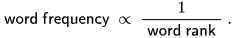

For instance, in the Brown Corpus of American English text, the word "the" is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's law, the second-place word "of" accounts for slightly over 3.5% of words (36,411 occurrences), followed by "and" (28,852).

This law is not followed precisely in all cases, though.

- Make a bar plot of the word count for the smart tokenization scheme using only the 20 most used words. Add a line that perfectly follows Zipf's law to check where the law holds.

In [55]:
from matplotlib import pyplot as plt 

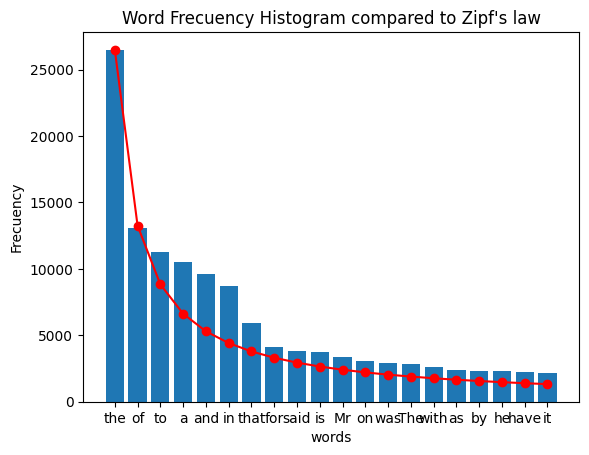

In [64]:
### START YOUR CODE HERE
words_shown = 20
words_data = words_tokenizer.most_common(words_shown)

elements = [word for word, _ in words_data] 
frecuency = [count for _, count in words_data]

# zip's law is not 1/n but frecuency of the most common word * 1/n == f/n
f = frecuency[0]
fn_values = [f / (i + 1) for i in range(len(frecuency))]

plt.plot(elements, fn_values, color='red', marker='o', linestyle='-', label='f/n')
plt.bar(elements, frecuency)
plt.xlabel('words')
plt.ylabel('Frecuency')
plt.title("Word Frecuency Histogram compared to Zipf's law")
plt.show()

# ### END YOUR CODE HERE

- Based on the plot, where does Zipf’s law appear to hold? Are there any outliers?

it seems reasonable to afirmate that Zipf's law hold, however words tend to occur a bit more than predicted, being clear examples of that words from "to" to "that". then it starts to follow the curve better